In [2]:
import pandas as pd

df = pd.read_csv("smart_manufacturing_data.csv")
df.head()


,timestamp,machine_id,temperature,vibration,humidity,pressure,energy_consumption,machine_status,anomaly_flag,predicted_remaining_life,failure_type,downtime_risk,maintenance_required
0,2025-01-01 00:00:00,39,78.61,28.65,79.96,3.73,2.16,1,0,106,Normal,0.0,0
1,2025-01-01 00:01:00,29,68.19,57.28,35.94,3.64,0.69,1,0,320,Normal,0.0,0
2,2025-01-01 00:02:00,15,98.94,50.20,72.06,1.00,2.49,1,1,19,Normal,1.0,1
3,2025-01-01 00:03:00,43,90.91,37.65,30.34,3.15,4.96,1,1,10,Normal,1.0,1
4,2025-01-01 00:04:00,8,72.32,40.69,56.71,2.68,0.63,2,0,65,Vibration Issue,0.0,1


In [3]:
df.columns


Index(['timestamp', 'machine_id', 'temperature', 'vibration', 'humidity',
       'pressure', 'energy_consumption', 'machine_status', 'anomaly_flag',
       'predicted_remaining_life', 'failure_type', 'downtime_risk',
       'maintenance_required'],
      dtype='object')

In [4]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

df.head()


,machine_id,temperature,vibration,humidity,pressure,energy_consumption,machine_status,anomaly_flag,predicted_remaining_life,failure_type,downtime_risk,maintenance_required
timestamp,,,,,,,,,,,,
2025-01-01 00:00:00,39,78.61,28.65,79.96,3.73,2.16,1,0,106,Normal,0.0,0
2025-01-01 00:01:00,29,68.19,57.28,35.94,3.64,0.69,1,0,320,Normal,0.0,0
2025-01-01 00:02:00,15,98.94,50.20,72.06,1.00,2.49,1,1,19,Normal,1.0,1
2025-01-01 00:03:00,43,90.91,37.65,30.34,3.15,4.96,1,1,10,Normal,1.0,1
2025-01-01 00:04:00,8,72.32,40.69,56.71,2.68,0.63,2,0,65,Vibration Issue,0.0,1


In [5]:
sensor_df = df[['temperature']]
sensor_df.head()


,temperature
timestamp,
2025-01-01 00:00:00,78.61
2025-01-01 00:01:00,68.19
2025-01-01 00:02:00,98.94
2025-01-01 00:03:00,90.91
2025-01-01 00:04:00,72.32


In [9]:
sensor_df = sensor_df.ffill()
sensor_df = sensor_df[sensor_df['temperature'] >= 0]


In [10]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.02, random_state=42)

sensor_df['anomaly'] = model.fit_predict(sensor_df[['temperature']])
sensor_df['anomaly'] = sensor_df['anomaly'].map({1: 0, -1: 1})

sensor_df.head()


,temperature,anomaly
timestamp,,
2025-01-01 00:00:00,78.61,0
2025-01-01 00:01:00,68.19,0
2025-01-01 00:02:00,98.94,1
2025-01-01 00:03:00,90.91,0
2025-01-01 00:04:00,72.32,0


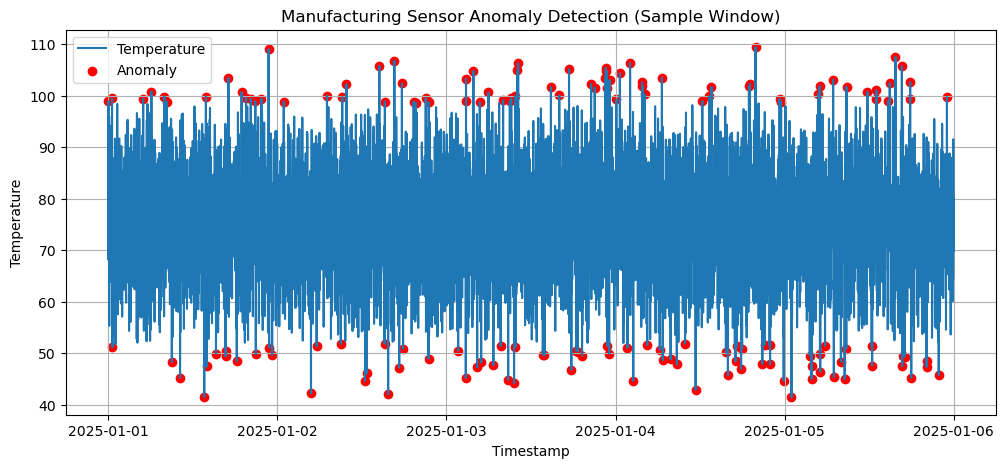

In [17]:
import matplotlib.pyplot as plt

sample_df = sensor_df.loc['2025-01-01':'2025-01-05']

plt.figure(figsize=(12,5))
plt.plot(sample_df.index, sample_df['temperature'], label='Temperature')

plt.scatter(
    sample_df[sample_df['anomaly'] == 1].index,
    sample_df[sample_df['anomaly'] == 1]['temperature'],
    color='red',
    label='Anomaly'
)

plt.title("Manufacturing Sensor Anomaly Detection (Sample Window)")
plt.xlabel("Timestamp")
plt.ylabel("Temperature")
plt.legend()
plt.grid(True)
plt.show()
